In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_predict,cross_val_score
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.feature_selection import RFE, SelectKBest,chi2,f_classif
import numpy as np
from scipy.special import logsumexp

df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
def replacement(col):
    df[col]=df[col].replace(0,round(df[df[col]!=0][col].mean(),0))

In [3]:
replacement("pregnancies")

In [4]:
replacement("glucose")

In [5]:
replacement("diastolic")

In [6]:
replacement("triceps")

In [7]:
replacement("insulin")

In [8]:
replacement("bmi")

In [9]:
replacement("dpf")

In [10]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [11]:
X=df.drop(["diabetes"],1)
y=df["diabetes"]

### Simple Logistic Regression

In [12]:
log_reg=LogisticRegression()

In [13]:
cols=list(X)
scaler=StandardScaler()

In [14]:
X=pd.DataFrame(scaler.fit_transform(X),columns=cols)

In [15]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [16]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=log_reg.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.51      0.59        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



In [19]:
ranking=log_reg.coef_.tolist()[0]

In [20]:
features=list(X)

In [23]:
coef=pd.Series(ranking,index=features)

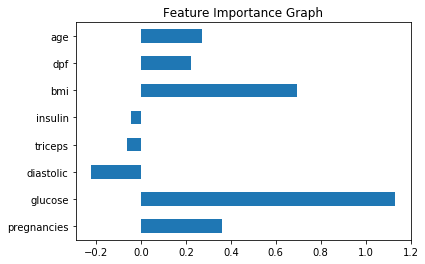

In [24]:
coef.plot(kind='barh')
plt.title("Feature Importance Graph")
plt.show()

### Logistic Regression using GridSearchCV

In [25]:
params = {'C' : np.arange(0.001,10,0.2), 'penalty' : ['l1','l2']}  

In [26]:
new_log_reg=GridSearchCV(log_reg,params,cv=5)

In [27]:
new_log_reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-03...
       4.801e+00, 5.001e+00, 5.201e+00, 5.401e+00, 5.601e+00, 5.801e+00,
       6.001e+00, 6.201e+00, 6.401e+00, 6.601e+00, 6.801e+00, 7.001e+00,
       7.201e+00, 7.401e+00, 7.601e+00, 7.801e+00, 8.001e+00, 8.201e+00,
       8.401e+00, 8.601e+00, 8.801e+00, 9.001e+00, 9.201e+00, 9.401e+00,
 

In [28]:
new_log_reg.best_params_

{'C': 0.201, 'penalty': 'l2'}

In [29]:
best_model=new_log_reg.best_estimator_

In [30]:
best_model

LogisticRegression(C=0.201, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Recursive Feature Elimination using Best model of GridSearchCV

In [31]:
rfe=RFE(best_model,4)

In [32]:
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=0.201, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [34]:
rfe_ranking=list(rfe.ranking_)

In [37]:
pd.DataFrame(list(zip(features,rfe_ranking)),columns=["Features","Ranking"]).sort_values('Ranking')

,Features,Ranking
0,pregnancies,1
1,glucose,1
5,bmi,1
6,dpf,1
7,age,2
2,diastolic,3
3,triceps,4
4,insulin,5
